# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [17]:
# Import of packages
from scipy import optimize 
import numpy as np
import math 
import matplotlib.pyplot as plt 
import numpy as np

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

We're constructing a function which solves the maximisation problem given. We set the parameters given and take a guess at the parameter value for the wage rate. 

The and objective utility functions are defined along with the total resources and constraints. 

In [18]:
# Setting parameters 
m = 1       # Money
v = 10      # Disultity of working
e = 0.3     # Frisch elasticity of labour supply
t0 = 0.4    # Standard labour tax income
t1 = 0.1    # Tax for income above kappa
K = 0.4     # Threshold for high tax
w = 0.5     # Wage rate

# Defining utility function
def u_func(c, l) :    
        f = math.log(c)-v*((l**(1+e**-1))/(1+e**-1))
        return f
    
# Defining total resources
def total_resources(l):          
    c = m+w*l-[t0*w*l+t1*max(w*l-K,0)]
    return c

# Defining objective function
def objective_function(x0) :   # Prior to maximization it is necessary to create an array 
    c = x0[0]                  # Initial value for consumption
    l = x0[1]                  # Initial value for labour supply
    
    # It is not possible to optimize but only minimize, thus a minus is used 
    return -u_func(c,l)       

# Defining constraints
def constraint_function(x0) :  # As for the objective function, we need to create an array
    c = x0[0]
    l = x0[1]
    
    return c- total_resources(l)


Having defined the parameters, functions and constraints we move onto actually solving the maximisation problem by using a solver. The bounds are set and the first bounds is for consumption and cannot be negative and the second bound is assigned a high value to insure that our maximum is true. We take an initial guess at the values to speed up the process. 

In [19]:
# Defining a solver
def solve() :           
    constraints = ({'type': 'eq', 'fun': constraint_function}) # Constraint function (negative if violated).
    bounds = [(0,100), (0,1)]  
# Calling the optimizer
    initial_guess = [0.5, 0.5]
    res = optimize.minimize(
    objective_function, initial_guess, method='SLSQP', bounds=bounds, constraints=constraints) 

# Printing the result
    return res
solve()

     fun: -0.07560365682718201
     jac: array([-0.90781579,  0.27026627])
 message: 'Optimization terminated successfully.'
    nfev: 30
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([1.10177787, 0.33925956])

# Question 2

We're constructing a plot with $l^*$ and $c^*$ functions of w in the range 0.5 to 1.5. We first choose a plot style and subsequently defines the uniform w. We create a for loop which iterates over w. 

As a second step we plot optimal labour supply given the wage rate and plot the optimal consumption given the wage rate in two different plots. 

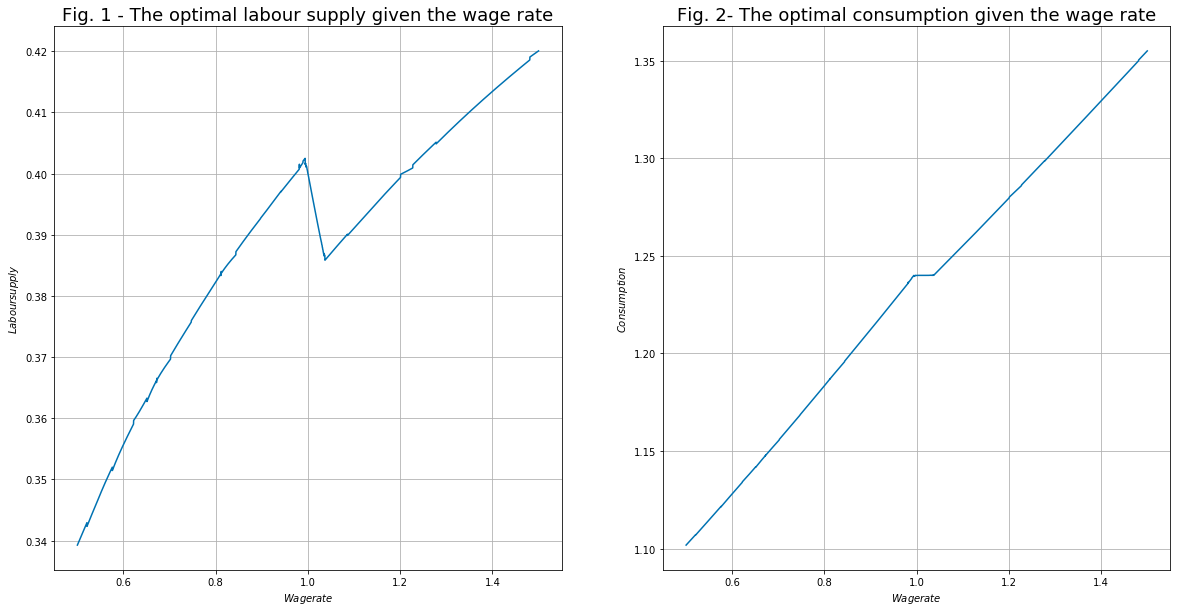

In [20]:
# # Setting plot style
plt.style.use('seaborn-colorblind')

# Defining the uniform w
c_star = []                          
l_star = []                          
w_uniform = np.linspace(0.5, 1.5, 10000) 

for w in w_uniform:
    res = solve()
    c_star.append(res.x[0])
    l_star.append(res.x[1])

fig = plt.figure(figsize=(20, 10))

# Plotting optimal labour supply given wage rate
ax_left = fig.add_subplot(1, 2, 1)
ax_left.plot(w_uniform, l_star)

# Assigning title and label names to the figure
ax_left.set_title('Fig. 1 - The optimal labour supply given the wage rate', fontsize=18)
ax_left.set_xlabel('$Wage rate$')
ax_left.set_ylabel('$Labour supply$')
ax_left.grid(True)

# Plotting  optimal consumption given wage rate
ax_right = fig.add_subplot(1, 2, 2)
ax_right.plot(w_uniform, c_star)

# Assigning title and label names to the figure
ax_right.set_title('Fig. 2- The optimal consumption given the wage rate', fontsize=18)
ax_right.set_xlabel('$Wage rate$')
ax_right.set_ylabel('$Consumption$')
ax_right.grid(True)

# Question 3

We're now wanting to calculate the total tax revenue given by the function stated in the assignment. 


We set a seed number and define the unfirom w with the boundaries given in previous question. The initial tax revenue is set equal to 0. A for loop is creating iterating over w in w_uniform. 

In [21]:
np.random.seed(89) # Defining a random seed number

# Defining the uniform w
N = 10000
l_star = []
c_star = []

w_uniform = np.random.uniform(low = 0.5, high = 1.5, size = N)

tax_revenue = 0      # Initial tax value

for w in w_uniform:
    res = solve()
    c_star.append(res.x[0])
    l_star.append(res.x[1])
    tax = t0 * res.x[1] * w + t1 * max(w * res.x[1] - K, 0)
                  
tax_revenue = (tax_revenue + tax) * N


print(f'Total tax revenue is {tax_revenue:,.3f} billion dollars')

Total tax revenue is 1,626.156 billion dollars


# Question 4

We're now looking at what tax revenue would be if ε = 0.1. We repeat the procedure from Question 3 but set a new value for ε. 

In [22]:
np.random.seed(89) # Defining a random seed number
e = 0.1       # Defining a new value of epsilon
tax_revenue = 0  # Initial value 

for w in w_uniform:
    res = solve()
    c_star.append(res.x[0])
    l_star.append(res.x[1])
    tax = t0 * res.x[1] * w + t1 * max(w * res.x[1] - K, 0)
                  
tax_revenue = (tax_revenue + tax) * N


print(f'The total tax revenue is {tax_revenue:,.3f} billion dollars')

The total tax revenue is 3,366.817 billion dollars


The total tax revenue is thus 3,366.817 billion dollars. We see that when increasing the elasticity of labour supply it results in a higher tax revenue. The revenue increases as it is now more beneficial to supply more labour for a given wage.

# Question 5

Considering a politician who wishes to maximize the tax revenue. We're estimating what τ0, τ1 and κ we would you suggest her to implement and reporting the tax revenue we expect to obtain.



We find new values of $\tau_0$, $\tau_1$ and $\kappa$ that maximize total tax revenue. This is achieved by defining a vector of the 5 variables we are wanting to maximize, and subsequently optimizing the total tax revenue wrt these five variables.

In [25]:
# Assigning a random value to l and defining the vector of variables we use to optimize tax revenue
l = 0.4
v = ([t0, t1,K , w_uniform, l])

# Defining a new total resourses function
def total_resources2(v):
    v = m + v[3] * v[4] - (v[0] * v[3] * v[4] + v[1] * (max(v[3]-v[2],0)))
    return v

# Defining a function for total tax revenue as a sum of the individual tax payments for the 10000 N
def tax(v):
        return np.sum(v[0] * v[3] * v[4] + v[1] * np.max(v[3]*v[4]-v[2],0))

def max_tax(v):
    return -tax(v)

# Multivariate optimizer 
constraint = ({"type":"ineq","fun": total_resources2})
bounds = ((0,1), (0,1), (0,1), (0.5,1.5), (0,1))

# Using the given values and call a solver
initial_guess = [0.4, 0.1, 0.4, 1, 0.5]
tax_res = optimize.minimize(max_tax, initial_guess, bounds=bounds, constraints=constraint, method='SLSQP')
print(tax_res.message)

# Unpacking the results
w_optimal = tax_res.x[3]
l_optimal = tax_res.x[4]
l_total_optimal = l_optimal*10000
t0_optimal = tax_res.x[0]
t1_optimal = tax_res.x[1]
K_optimal = tax_res.x[2]

# Defining optimal tax revenue
tax_revenue_optimal = np.sum(max_tax([w_optimal, l_optimal, t0_optimal, t1_optimal, K_optimal]))

# Results
print(f'Standard Labor Income Tax: {t0_optimal:.3f}')
print(f'Top Bracket Labor Income Tax: {t1_optimal:.3f}')
print(f'Cut-off for Top Labor Income Tax: {K_optimal:.3f}')
print(f'Total Tax Revenue: {tax_revenue_optimal * N:.3f}')

Optimization terminated successfully.
Standard Labor Income Tax: 0.911
Top Bracket Labor Income Tax: 0.822
Cut-off for Top Labor Income Tax: 0.122
Total Tax Revenue: 6613.931


The optimised total tax revenue with respect to the three tax parameters set by the government yields that the optimal policy is $\tau_{0}=0.911$, $\tau_{1}=0.822$ and $\kappa=0.122$. This returns a tax revenue of $6613.931$.

# Conclusion

(1) we found the optimal consumption equal to 1,10 and optimal labor supply equal to 0,34, (2) The labor supply and consumption both are positively correlated with the wage rate. (3) The total tax revenue is equal to 1,626.156 billion dollars. (4) Then the labor supply elasticity is more in-elastic, the revenue has risen to 2,826.643 billion dollars. (5) we had technical issues with the fifth question.  